# Ergonomic Engineering: Measures and Technologies 📏🖥️

Welcome to this notebook! Here, we will explore the various measures and technologies used in the field of ergonomic engineering. Ergonomics is the science of designing products, systems, or processes to fit the people who interact with them. It is crucial in ensuring the well-being, comfort, and productivity of individuals working in various environments.

This notebook is structured as follows:

---
## 📖 Table of Contents
1. [**Introduction to Ergonomics**](#1-introduction-to-ergonomics)
2. [**Key Ergonomic Measures**](#2-key-ergonomic-measures)
    * [Anthropometry](#21-anthropometry)
    * [Musculoskeletal Disorders](#22-musculoskeletal-disorders)
    * [Cognitive Ergonomics](#23-cognitive-ergonomics)
3. [**Ergonomic Technologies**](#3-ergonomic-technologies)
    * [Biomechanics Simulation](#31-biomechanics-simulation)
    * [Virtual Reality](#32-virtual-reality)
    * [Wearable Devices](#33-wearable-devices)
4. [**Conclusion**](#4-conclusion)
5. [**References**](#5-references)

---



## 1. Introduction to Ergonomics 📚
<a id='1-introduction-to-ergonomics'></a>
In this section, we will provide an overview of ergonomic engineering and its importance. We will discuss the various disciplines involved in ergonomics, including physical, cognitive, and organizational ergonomics.


## 2. Key Ergonomic Measures 📐
<a id='2-key-ergonomic-measures'></a>
Here, we will explore the key measures used to assess and improve ergonomic designs. This includes anthropometry, musculoskeletal disorders, and cognitive ergonomics.



### 2.1 Physiology in Ergonomics 🧬
<a id='34-physiology-in-ergonomics'></a>
Physiology plays a crucial role in ergonomic engineering, as it focuses on understanding the functions and processes of the human body. By incorporating knowledge of human physiology, ergonomic designs can better accommodate the needs and limitations of individuals. In this section, we will discuss key physiological aspects relevant to ergonomics:




#### 2.1.1. Circulation and Blood Flow 🩸
Proper blood circulation is vital for maintaining overall health and well-being. Ergonomic designs should take into account factors such as seating and standing positions, which can impact blood flow, especially to the lower extremities. Additionally, incorporating opportunities for movement and postural changes can help promote better circulation.

In [1]:
import pandas as pd
import scipy as sp
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PPG_data = pd.read_csv('data\physiology\PPG_data.csv')
print('number of values :', len(PPG_data['Red_Signal']))
PPG_data

number of values : 2996500


,Time,Red_Signal
0,12:54:40.369052,705
1,12:54:40.369900,559
2,12:54:40.369900,438
3,12:54:40.370917,334
4,12:54:40.370917,254
...,...,...
2996495,23:59:52.436623,468
2996496,23:59:52.452634,467
2996497,23:59:52.452634,468
2996498,23:59:52.468647,467


In [3]:
LIMITED_PPG_data = PPG_data.iloc[:20000]
print('number of values :', len(LIMITED_PPG_data['Red_Signal']))

number of values : 20000


In [4]:
LIMITED_PPG_data['timestamp'] = pd.to_datetime(LIMITED_PPG_data['Time'])
LIMITED_PPG_data

C:\Users\pier5\AppData\Local\Temp\ipykernel_15336\3160793579.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  LIMITED_PPG_data['timestamp'] = pd.to_datetime(LIMITED_PPG_data['Time'])
C:\Users\pier5\AppData\Local\Temp\ipykernel_15336\3160793579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LIMITED_PPG_data['timestamp'] = pd.to_datetime(LIMITED_PPG_data['Time'])


,Time,Red_Signal,timestamp
0,12:54:40.369052,705,2023-04-23 12:54:40
1,12:54:40.369900,559,2023-04-23 12:54:40
2,12:54:40.369900,438,2023-04-23 12:54:40
3,12:54:40.370917,334,2023-04-23 12:54:40
4,12:54:40.370917,254,2023-04-23 12:54:40
...,...,...,...
19995,12:57:51.279458,658,2023-04-23 12:57:51
19996,12:57:51.279458,660,2023-04-23 12:57:51
19997,12:57:51.295472,665,2023-04-23 12:57:51
19998,12:57:51.310757,670,2023-04-23 12:57:51


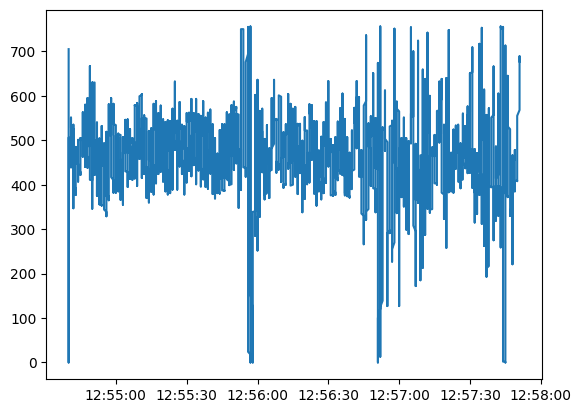

In [5]:
plt.plot(LIMITED_PPG_data['timestamp'],LIMITED_PPG_data['Red_Signal'])
plt.show()

Moving filter : 

In [6]:
# Fonction pour appliquer le filtrage médian
def moving_median_filter(data, window_size):
    return data.rolling(window=window_size, center=True).median()

# Fonction pour appliquer le filtrage par moyenne mobile
def moving_average_filter(data, window_size):
    return data.rolling(window=window_size, center=True).mean()

In [7]:
# Paramètres des filtres
median_window_size = 200
moving_average_window_size = 200

In [8]:
# Application des filtres
LIMITED_PPG_data['Median_filtered'] = moving_median_filter(LIMITED_PPG_data['Red_Signal'], median_window_size)
LIMITED_PPG_data['Average_filtered'] = moving_average_filter(LIMITED_PPG_data['Red_Signal'], moving_average_window_size)

C:\Users\pier5\AppData\Local\Temp\ipykernel_15336\3962499559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LIMITED_PPG_data['Median_filtered'] = moving_median_filter(LIMITED_PPG_data['Red_Signal'], median_window_size)
C:\Users\pier5\AppData\Local\Temp\ipykernel_15336\3962499559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LIMITED_PPG_data['Average_filtered'] = moving_average_filter(LIMITED_PPG_data['Red_Signal'], moving_average_window_size)


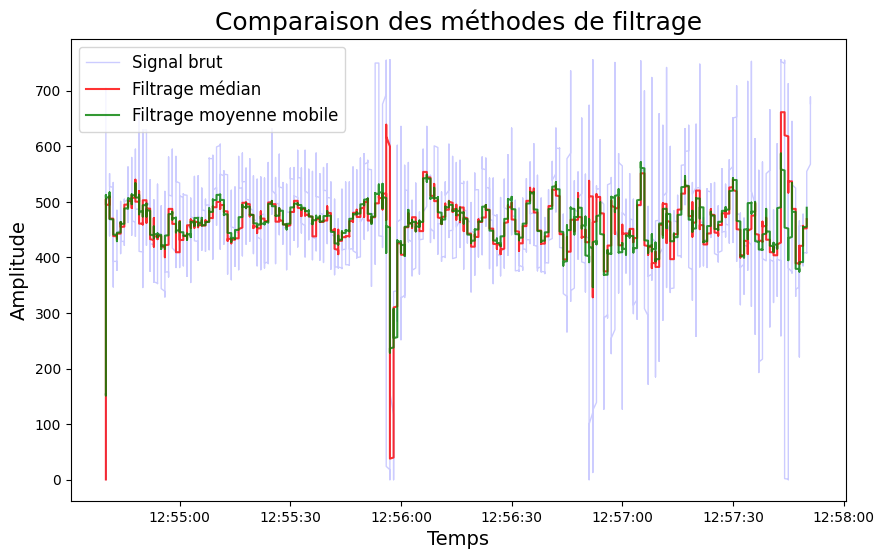

In [9]:
# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(10, 6))

# Tracé des courbes
ax.plot(LIMITED_PPG_data['timestamp'],LIMITED_PPG_data['Red_Signal'], label='Signal brut', color='blue', linewidth=1.0 , alpha=0.2)
ax.plot(LIMITED_PPG_data['timestamp'],LIMITED_PPG_data['Median_filtered'], label='Filtrage médian', color='red', linestyle='-', linewidth=1.5 , alpha=0.8)
ax.plot(LIMITED_PPG_data['timestamp'],LIMITED_PPG_data['Average_filtered'], label='Filtrage moyenne mobile', color='green', linestyle='-', linewidth=1.5 , alpha=0.8)

# Configuration du titre, des étiquettes des axes et de la légende
ax.set_title('Comparaison des méthodes de filtrage', fontsize=18)
ax.set_xlabel('Temps', fontsize=14)
ax.set_ylabel('Amplitude', fontsize=14)
ax.legend(fontsize=12)

# Affichage de la figure
plt.show()

#### 2.1.2. Muscle Activity and Fatigue 💪
Understanding muscle activity and fatigue is essential for designing workspaces and tasks that minimize the risk of injury and discomfort. Ergonomic designs should consider the forces and postures required for specific tasks, as well as the duration and frequency of these tasks, to reduce muscle strain and prevent fatigue.


In [10]:
EMG_data = pd.read_csv('data\physiology\EMG_data.csv')
print('number of values :', len(EMG_data))
EMG_data

number of values : 4237907


,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.00000,0.00002,0.00002,0,36


In [11]:
Time = EMG_data['time']
EMG_data = EMG_data['channel1']

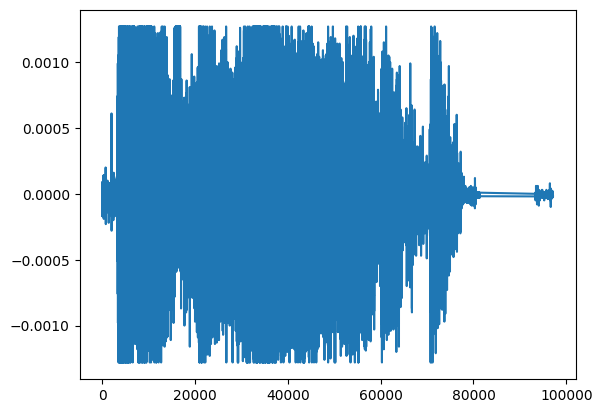

In [12]:
plt.plot(Time , EMG_data)
plt.show()

FFT

In [13]:
# Calculer la durée et la fréquence d'échantillonnage
duration = (Time.iloc[-1] - Time.iloc[0]) / 1000  # en secondes
num_samples = len(Time)
fs = num_samples / duration

print(duration , num_samples , fs )

50.965 4237907 83153.28166388697


In [14]:
# Fonction pour calculer la transformée de Fourier rapide (FFT) et le spectre de fréquence
def fft_frequency_spectrum(data, fs):
    n = len(data)
    fft_values = np.fft.rfft(data)
    frequencies = np.fft.rfftfreq(n, 1/fs)
    fft_magnitude = np.abs(fft_values)
    return frequencies, fft_magnitude

In [15]:
# Calcul de la FFT et du spectre de fréquence pour channel1
frequencies, fft_magnitude = fft_frequency_spectrum(EMG_data, fs)

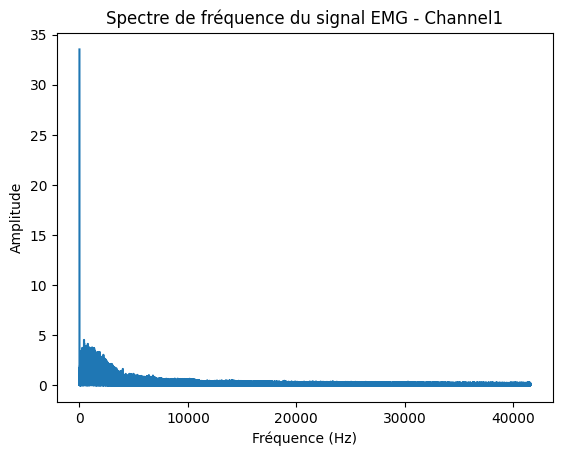

In [16]:
# Affichage du spectre de fréquence
plt.figure()
plt.plot(frequencies, fft_magnitude)


plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectre de fréquence du signal EMG - Channel1')
plt.show()

## Filter Types: Low-pass, High-pass, Band-pass, and Stop-band 🎚️

Filters are essential components in signal processing, as they help to manipulate and refine signals by allowing specific frequency ranges to pass through while attenuating others. In this explanation, we will discuss the differences between four common filter types: low-pass, high-pass, band-pass, and stop-band filters.

### 1. Low-pass Filter ⬇️
A **low-pass filter** allows frequencies below a certain cutoff point to pass through while attenuating (reducing) higher frequencies. It is commonly used in applications that require the removal of high-frequency noise or the preservation of low-frequency signal components.

### 2. High-pass Filter ⬆️
A **high-pass filter** works opposite to a low-pass filter. It allows frequencies above a certain cutoff point to pass through while attenuating lower frequencies. High-pass filters are often used to eliminate low-frequency noise or to isolate high-frequency signal components.

### 3. Band-pass Filter ↔️
A **band-pass filter** is a combination of low-pass and high-pass filters. It allows a specific range of frequencies (a "band") to pass through while attenuating frequencies outside of this range. Band-pass filters are useful in applications that require isolating a particular frequency range or removing unwanted frequencies on both sides of the desired band.

### 4. Stop-band (Band-stop) Filter 🚫
A **stop-band (or band-stop) filter** is the opposite of a band-pass filter. It attenuates a specific range of frequencies (a "band") while allowing frequencies outside of this range to pass through. This type of filter is useful when you need to remove a particular frequency range, such as eliminating a specific noise source or interference.

---





![](https://www.norwegiancreations.com/wp-content/uploads/2016/03/filters.png)


In [17]:
# Fonction pour créer un filtre Butterworth
def butter_filter(cutoff, fs, order=4, filter_type='low'):
    nyq = 0.5 * fs
    normalized_cutoff = cutoff / nyq
    b, a = butter(order, normalized_cutoff, btype=filter_type)
    return b, a

# Fonction pour appliquer un filtre à un signal
def apply_filter(signal, cutoff, fs, order=4, filter_type='low'):
    b, a = butter_filter(cutoff, fs, order, filter_type)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

In [18]:
# Paramètres des filtres
low_cutoff = 20  # Hz
high_cutoff = 500  # Hz
band_low_cutoff = 50  # Hz
band_high_cutoff = 150  # Hz
order = 4

In [19]:
# Application des filtres
low_pass_filtered_signal = apply_filter(EMG_data, low_cutoff, fs, order, 'low')
high_pass_filtered_signal = apply_filter(EMG_data, high_cutoff, fs, order, 'high')
band_pass_filtered_signal = apply_filter(apply_filter(EMG_data, band_low_cutoff, fs, order, 'high'), band_high_cutoff, fs, order, 'low')

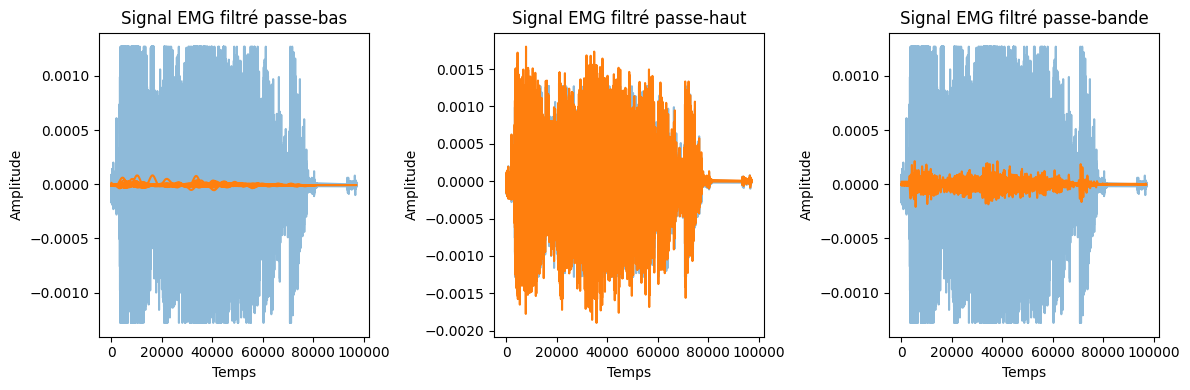

In [20]:
# Tracer les signaux filtrés
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(Time,EMG_data,alpha = 0.5)
plt.plot(Time, low_pass_filtered_signal)
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title('Signal EMG filtré passe-bas')

plt.subplot(132)
plt.plot(Time, EMG_data,alpha = 0.5)
plt.plot(Time, high_pass_filtered_signal)
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title('Signal EMG filtré passe-haut')

plt.subplot(133)
plt.plot(Time,EMG_data,alpha = 0.5)
plt.plot(Time, band_pass_filtered_signal)
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title('Signal EMG filtré passe-bande')

plt.tight_layout()
plt.show()

# EMG Data Enrichment Techniques 📈

Electromyography (EMG) is a valuable tool for assessing muscle function and activity. To extract meaningful information from EMG signals, various data enrichment techniques can be applied. In this summary, we will discuss some of the best techniques for EMG data enrichment, including Root Mean Square (RMS), among others.

## 1. Root Mean Square (RMS) 📐
RMS is a widely-used technique for quantifying the amplitude of EMG signals. It calculates the square root of the mean of the squared signal values within a specific window. RMS provides a measure of the overall muscle activity, making it useful for comparing muscle contractions and assessing muscle fatigue.

## 2. Mean Absolute Value (MAV) 📏
MAV calculates the average of the absolute values of the EMG signal within a specific window. Like RMS, MAV is useful for quantifying the amplitude of muscle contractions and evaluating muscle fatigue.

## 3. Integrated EMG (IEMG) 🧮
IEMG is the cumulative sum of the absolute values of the EMG signal over a specific time period. It provides a measure of the total muscle activity during that period, making it useful for assessing muscle force and endurance.

## 4. Waveform Length (WL) 🌊
WL is the cumulative sum of the absolute differences between adjacent EMG signal values within a specific window. It is sensitive to both the amplitude and frequency content of the EMG signal, making it a valuable feature for EMG pattern recognition.

## 5. Zero Crossings (ZC) and Slope Sign Changes (SSC) ⭕
ZC and SSC are both time-domain features that provide information about the frequency content of the EMG signal. ZC counts the number of times the EMG signal crosses the zero line, while SSC counts the number of times the slope of the signal changes its sign. Both features can be useful for identifying specific muscle activation patterns.

## 6. Frequency-domain Features 🌐
Analyzing EMG signals in the frequency domain can provide additional insights into muscle activity. Techniques such as Fast Fourier Transform (FFT) or Wavelet Transform (WT) can be used to extract frequency-domain features, including mean, median, and peak frequencies, as well as the power spectral density (PSD).

### 2.1. Anthropometry 📏
<a id='21-anthropometry'></a>
Anthropometry is the study of human body measurements, which are essential in ergonomic design. We will discuss the various anthropometric data and methods used to create comfortable and efficient workspaces.

### 2.3. Cognitive Ergonomics 🧠
<a id='23-cognitive-ergonomics'></a>
In this section, we will delve into cognitive ergonomics, which is concerned with mental processes, such as perception, memory, and problem-solving. We will discuss how to design work processes and environments to reduce cognitive strain and improve overall performance.


## 3. Ergonomic Technologies 💻
<a id='3-ergonomic-technologies'></a>
This section will highlight various technologies that have been developed to support ergonomic engineering, including biomechanics simulation, virtual reality, and wearable devices.

### 3.1. Biomechanics Simulation 🚶‍♂️
<a id='31-biomechanics-simulation'></a>
Biomechanics simulation is a valuable tool for analyzing human movement and assessing ergonomic designs. We will discuss its applications and benefits in ergonomic engineering.

In [21]:
SPRINT_data = pd.read_excel("data/biomechanics/Sprint_data.xlsx")
SPRINT_data

,time,position
0,0.01,0.000000
1,0.02,0.001881
2,0.03,0.004685
3,0.04,0.008402
4,0.05,0.013021
...,...,...
595,5.96,40.785390
596,5.97,40.864829
597,5.98,40.944269
598,5.99,41.023709


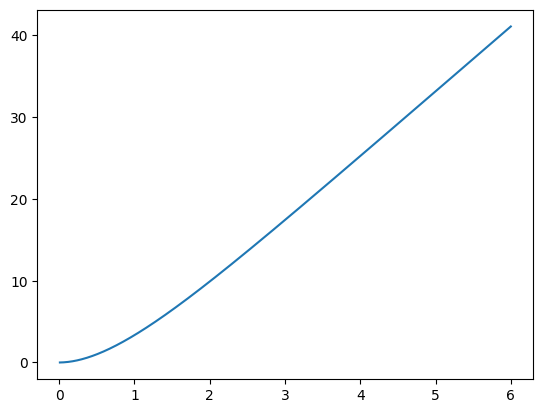

In [27]:
plt.plot(SPRINT_data['time'],SPRINT_data['position'])
plt.show()

In [28]:
def calculate_velocity_and_acceleration(data):
    # Calcul de la vitesse instantanée (dérivée première de la position)
    velocity = np.gradient(data['position'], data['time'])

    # Calcul de l'accélération (dérivée seconde de la position)
    acceleration = np.gradient(velocity, data['time'])

    return velocity, acceleration

In [29]:
# Calcul de la vitesse et de l'accélération
velocity, acceleration = calculate_velocity_and_acceleration(SPRINT_data)

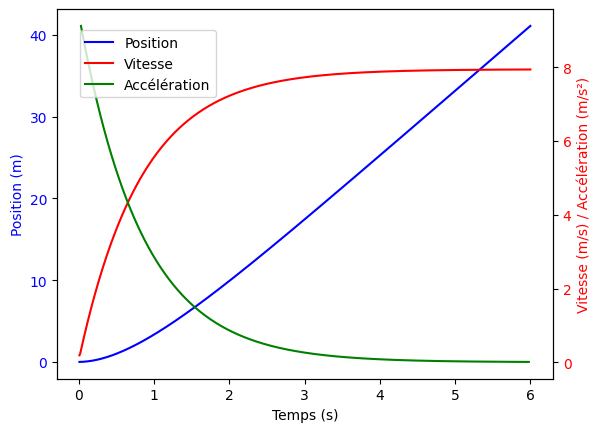

In [37]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Tracer la position sur le premier axe des ordonnées
ax1.plot(SPRINT_data['time'], SPRINT_data['position'], label='Position', color='blue')
ax1.set_xlabel('Temps (s)')
ax1.set_ylabel('Position (m)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Créer un deuxième axe des ordonnées partageant le même axe des abscisses
ax2 = ax1.twinx()

# Tracer la vitesse et l'accélération sur le deuxième axe des ordonnées
ax2.plot(SPRINT_data['time'], velocity, label='Vitesse', color='red')
ax2.plot(SPRINT_data['time'][2:-2], acceleration[2:-2], label='Accélération', color='green')
ax2.set_ylabel('Vitesse (m/s) / Accélération (m/s²)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Afficher la légende
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))

plt.show()


### 3.2. Virtual Reality 🕶️
<a id='32-virtual-reality'></a>
Virtual reality (VR) technology